# Q3 AdaBoost

In [195]:
from __future__ import division

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [196]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y = iris.target

In [197]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='|S10')

In [198]:
y[y==1] = 0
y[y==2] = 1
X = pd.DataFrame(X)

In [200]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [201]:
X = X.iloc[:, [0, 3]].values

## a) AdaBoost Class

In [208]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

class Adaboost:
    
    def __init__(self):
        self.model_weights = []
        self.models = []
    
    def fit(self, X, y, rounds):
        weights = np.zeros(len(X)) + 1/(len(X))
        
        for i in range(rounds):
            
            plt.scatter(X[:, 0][y==0], X[:, 1][y==0], s = weights[y == 0]*5000)
            plt.scatter(X[:, 0][y==1], X[:, 1][y==1], s = weights[y == 0]*5000)
            plt.xlabel('sepal length')
            plt.ylabel('petal width')
            plt.title("Iteration - " + str(i))
            plt.show()
            
            classifier = DecisionTreeClassifier(max_depth = 1)
            classifier.fit(X, y)
            y_pred = classifier.predict(X)
            values = np.where(y == y_pred, 0, 1)
            accuracy = accuracy_score(y_pred, y)
            error = np.sum(np.multiply(weights, values))/np.sum(weights)
            stage = np.log((1 - error)/error)/2
#             print stage
            weights = np.multiply(weights, np.exp(stage*values))
            pmf = weights/np.sum(weights)
            l = np.array([np.random.choice(range(len(X)), p = np.reshape(pmf, len(X))) for i in range(len(X))])
            
            
            
            X = X[l, :]
            y = y[l]
            print(accuracy)

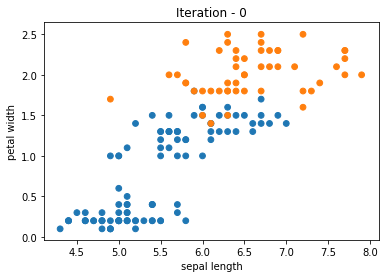

0.96


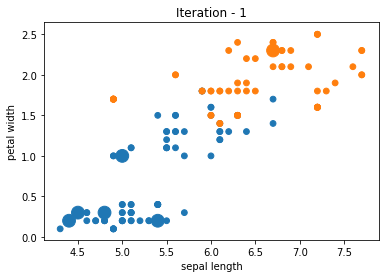

0.9133333333333333


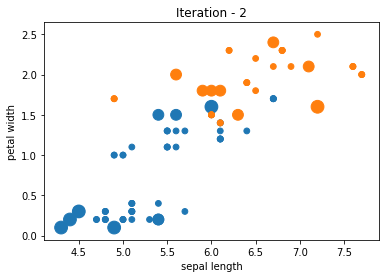

0.7666666666666667


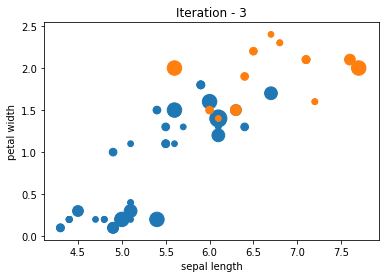

0.9533333333333334


In [209]:
model = Adaboost()
model.fit(X, y, 4)

## AdaBoost with outliers (Noise)

In [211]:
X0 = np.array([[6.5, 2], [6.8, 2.2], [6.8, 2.4], [7.0, 2.4], [7.9, 2.9]])
X1 = np.array([[4.5, 0.3], [5.5, 0.8], [5.0, 1.0], [5.5, 1.5], [7.0, 0.2]])

In [212]:
y0 = np.zeros(5)
y1 = np.zeros(5) + 1

In [213]:
X = np.concatenate((X, X0, X1), axis = 0)
y = np.concatenate((y, y0, y1), axis = 0)

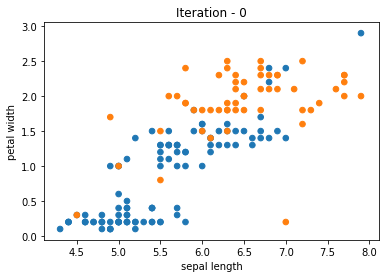

0.9


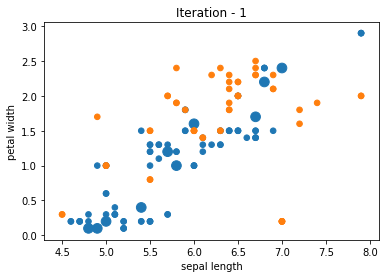

0.74375


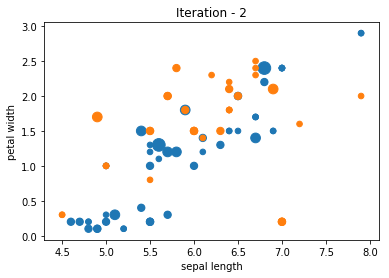

0.7


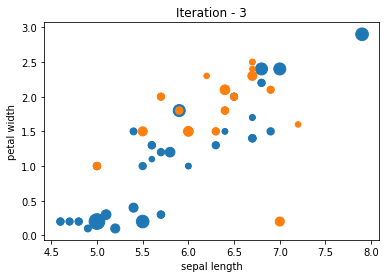

0.65625


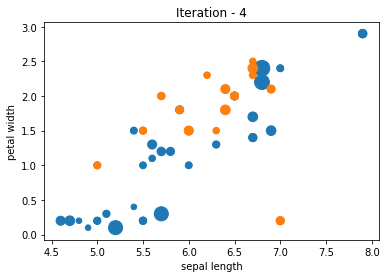

0.65


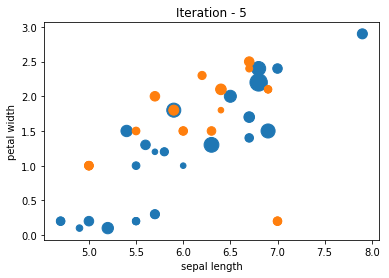

0.63125


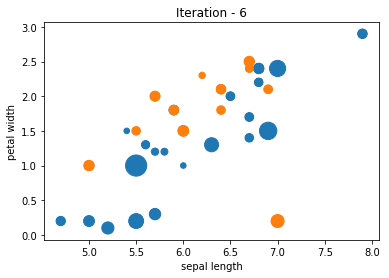

0.65625


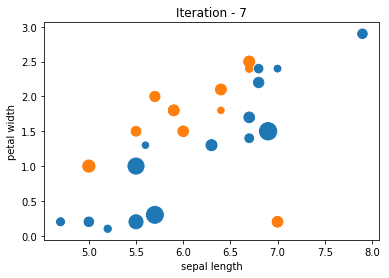

0.675


In [215]:
model = Adaboost()
model.fit(X, y, 8)

** Observation: ** As the number of iterations increase the weights of the values around the outliers are increasing. It is because Adaboost is trying to classify the wrongly predicted values around it